In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import random
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [3]:
import bioframe as bf

In [4]:
plt.rcParams["font.family"] = "Arial Narrow"

In [5]:
colors = {
    '0h'  : "#fde72580", 
    '1h'  : "#37b57880",
    '4h'  : "#21908d80",
    '7h'  : "#31668d80",
    '10h' : "#43377f80",
    '24h' : "#44015480",
    'w24h': '#fb852480',
#     'w48h': '#00000080',
}

In [6]:
compartments = pd.read_csv('../../data/ComplementaryData/HiC/p53_normalized_compartments.tsv', sep='\t')

In [7]:
compartments

,Unnamed: 0,Chromosome,Start,End,WT-NUT-0h,WT-NUT-1h,WT-NUT-4h,WT-NUT-7h,WT-NUT-10h,WT-NUT-24h,WT-NUT-w24h
0,0,1,1,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,100001,200000,NaN,NaN,NaN,NaN,NaN,NaN,0.190503
2,2,1,200001,300000,NaN,NaN,NaN,NaN,NaN,NaN,0.243394
3,3,1,300001,400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,400001,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30371,30371,X,154800001,154900000,0.189703,0.199737,0.254933,0.191116,0.221287,0.22803,0.314355
30372,30372,X,154900001,155000000,0.194494,0.220903,0.283882,0.197022,0.234084,NaN,0.342265
30373,30373,X,155000001,155100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30374,30374,X,155100001,155200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
chromosomes = set(compartments["Chromosome"])

In [9]:
times = [c[7:] for c in compartments.columns if c.startswith("WT")]

In [10]:
times

['0h', '1h', '4h', '7h', '10h', '24h', 'w24h']

In [11]:
def plot_comp_tads(chrom, beg, end, time1, time2, time0, axe=None):
    tmp_comp_y = np.array([r[1][f"WT-{'DMSO' if time1 == '0h' else 'NUT'}-{time1}"] 
                           for r in bf.select(bf_compartments, f"{chrom}:{beg}-{end}").iterrows()])
    tmp_comp_x = np.array([r[1]["start"] for r in bf.select(bf_compartments, f"{chrom}:{beg}-{end}").iterrows()])

    axe.bar(tmp_comp_x[tmp_comp_y > 0], tmp_comp_y[tmp_comp_y > 0], bottom=0, 
            width=90_000, color="tab:red", alpha=0.4)
    axe.bar(tmp_comp_x[tmp_comp_y < 0], tmp_comp_y[tmp_comp_y < 0], bottom=0, 
            width=90_000, color="tab:blue", alpha=0.4)

    tmp_tads = [r[1]["start"] for r in bf.select(bf_tads[(bf_tads[f"score_{time1}"] > 4)], 
                                                         f"{chrom}:{beg}-{end}").iterrows()]
    axe.plot(tmp_tads, [0] * len(tmp_tads), 'o', color='k', alpha=0.5)

    if time2 is not None:
        tmp_tads = [r[1]["start"] for r in bf.select(bf_tads[(bf_tads[f"score_{time1}"] > 4) & 
                                                             (bf_tads[f"score_{time2}"] <= 4)], 
                                                             f"{chrom}:{beg}-{end}").iterrows()]
        axe.plot(tmp_tads, [-0.1] * len(tmp_tads), 'v', color='tab:blue')
    if time0 is not None:
        tmp_tads = [r[1]["start"] for r in bf.select(bf_tads[(bf_tads[f"score_{time1}"] > 4) & 
                                                     (bf_tads[f"score_{time0}"] <= 4)], 
                                                     f"{chrom}:{beg}-{end}").iterrows()]
        axe.plot(tmp_tads, [0.1] * len(tmp_tads), '^', color='tab:red')


    axe.axhline(0, color='k', ls="--", lw=1)
    axe.set_ylim(-1.3, 1.3)
    axe.set_xlim(tmp_comp_x[0], tmp_comp_x[-1])
#     axe.set_xticks([])


In [15]:
bf_compartments = bf.from_any(compartments, cols=["Chromosome", "Start", "End"])

In [16]:
bf_compartments.columns

Index(['Unnamed: 0', 'Chromosome', 'Start', 'End', 'WT-NUT-0h', 'WT-NUT-1h',
       'WT-NUT-4h', 'WT-NUT-7h', 'WT-NUT-10h', 'WT-NUT-24h', 'WT-NUT-w24h'],
      dtype='object')

In [17]:
bf_compartments.columns = ['Unnamed: 0', 'chrom', 'start', 'end', 
                           'WT-NUT-0h', 'WT-NUT-1h', 'WT-NUT-4h', 'WT-NUT-7h', 'WT-NUT-10h', 
                           'WT-NUT-24h', 'WT-NUT-w24h']

In [18]:
bf_compartments["chrom"] = bf_compartments["chrom"].replace(dict((c[3:], c) for c in chromosomes))

In [19]:
bf_compartments

,Unnamed: 0,chrom,start,end,WT-NUT-0h,WT-NUT-1h,WT-NUT-4h,WT-NUT-7h,WT-NUT-10h,WT-NUT-24h,WT-NUT-w24h
0,0,1,1,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,100001,200000,NaN,NaN,NaN,NaN,NaN,NaN,0.190503
2,2,1,200001,300000,NaN,NaN,NaN,NaN,NaN,NaN,0.243394
3,3,1,300001,400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,400001,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30371,30371,X,154800001,154900000,0.189703,0.199737,0.254933,0.191116,0.221287,0.22803,0.314355
30372,30372,X,154900001,155000000,0.194494,0.220903,0.283882,0.197022,0.234084,NaN,0.342265
30373,30373,X,155000001,155100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30374,30374,X,155100001,155200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
bf_compartments = bf_compartments.fillna(0)

In [21]:
bf_compartments["diff"] = (bf_compartments[f"WT-NUT-{t0}"] - bf_compartments[f"WT-NUT-{t1}"])**2

In [22]:
bf_compartments

,Unnamed: 0,chrom,start,end,WT-NUT-0h,WT-NUT-1h,WT-NUT-4h,WT-NUT-7h,WT-NUT-10h,WT-NUT-24h,WT-NUT-w24h,diff
0,0,1,1,100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,1,1,100001,200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.190503,0.000000
2,2,1,200001,300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.243394,0.000000
3,3,1,300001,400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,4,1,400001,500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
30371,30371,X,154800001,154900000,0.189703,0.199737,0.254933,0.191116,0.221287,0.22803,0.314355,0.000101
30372,30372,X,154900001,155000000,0.194494,0.220903,0.283882,0.197022,0.234084,0.00000,0.342265,0.000697
30373,30373,X,155000001,155100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
30374,30374,X,155100001,155200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [23]:
bf_compartments.sort_values("diff").tail(10)

,Unnamed: 0,chrom,start,end,WT-NUT-0h,WT-NUT-1h,WT-NUT-4h,WT-NUT-7h,WT-NUT-10h,WT-NUT-24h,WT-NUT-w24h,diff
20246,20246,12,73000001,73100000,-0.933016,-0.131677,-0.332414,-0.341506,-0.947902,-0.938613,-0.434228,0.642144
20229,20229,12,71300001,71400000,-0.664911,0.137488,-0.266734,-0.209148,-0.700372,-0.646021,0.082852,0.643845
20254,20254,12,73800001,73900000,-0.761414,0.044016,-0.246671,-0.325316,-0.862493,-0.940444,-0.371341,0.648717
7920,7920,4,101400001,101500000,0.367404,-0.457406,-0.274495,-0.267781,0.078752,-0.522500,-0.190009,0.680311
12349,12349,7,900001,1000000,0.000000,0.827393,0.697499,0.719791,0.000000,0.000000,0.389899,0.684579
20371,20371,12,85500001,85600000,-0.578495,0.250106,0.002827,-0.048009,-0.654662,-0.767569,-0.205972,0.686579
20154,20154,12,63800001,63900000,-0.714045,0.125846,-0.240663,-0.315724,-0.724944,-0.890661,-0.117963,0.705417
20253,20253,12,73700001,73800000,-0.848639,-0.001478,-0.268323,-0.352092,-0.881255,-0.975399,-0.388762,0.717682
20153,20153,12,63700001,63800000,-0.710147,0.140143,-0.224407,-0.324978,-0.716206,-0.890683,-0.029467,0.722992
20245,20245,12,72900001,73000000,-0.902660,-0.032092,-0.345247,-0.226612,-0.900047,-0.882651,-0.360078,0.757890


In [24]:
bf_compartments = bf_compartments.reset_index()

In [25]:
bf_compartments[bf_compartments["diff"] > 0.5].sort_values("diff")

,index,Unnamed: 0,chrom,start,end,WT-NUT-0h,WT-NUT-1h,WT-NUT-4h,WT-NUT-7h,WT-NUT-10h,WT-NUT-24h,WT-NUT-w24h,diff
20303,20303,20303,12,78700001,78800000,-0.659849,0.048080,-0.256251,-0.273912,-0.734879,-0.947008,-0.262887,0.501162
20331,20331,20331,12,81500001,81600000,-0.827852,-0.118905,-0.321207,-0.353192,-0.813713,-0.924853,-0.264416,0.502605
20137,20137,20137,12,62100001,62200000,-1.026670,-0.316802,-0.624851,-0.698979,-1.025178,-1.010607,-0.514075,0.503913
20304,20304,20304,12,78800001,78900000,-0.647745,0.062262,-0.225460,-0.287435,-0.723310,-0.862049,-0.268617,0.504109
20140,20140,20140,12,62400001,62500000,-0.936719,-0.226697,-0.604066,-0.571510,-0.940808,-0.964747,-0.383020,0.504132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,20371,20371,12,85500001,85600000,-0.578495,0.250106,0.002827,-0.048009,-0.654662,-0.767569,-0.205972,0.686579
20154,20154,20154,12,63800001,63900000,-0.714045,0.125846,-0.240663,-0.315724,-0.724944,-0.890661,-0.117963,0.705417
20253,20253,20253,12,73700001,73800000,-0.848639,-0.001478,-0.268323,-0.352092,-0.881255,-0.975399,-0.388762,0.717682
20153,20153,20153,12,63700001,63800000,-0.710147,0.140143,-0.224407,-0.324978,-0.716206,-0.890683,-0.029467,0.722992


/tmp/ipykernel_74067/1752947208.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe.set_yticklabels(['', '-1.0', '0.0', '1.0'], size=8)
/tmp/ipykernel_74067/1752947208.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe.set_yticklabels(['', '-1.0', '0.0', '1.0'], size=8)
/tmp/ipykernel_74067/1752947208.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe.set_yticklabels(['', '-1.0', '0.0', '1.0'], size=8)
/tmp/ipykernel_74067/1752947208.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe.set_yticklabels(['', '-1.0', '0.0', '1.0'], size=8)
/tmp/ipykernel_74067/1752947208.py:27: UserWarning: set_ticklabels() should only be used with a fixe

Text(0.5, 0.98, 'chr12:55,000,000-95,000,000')

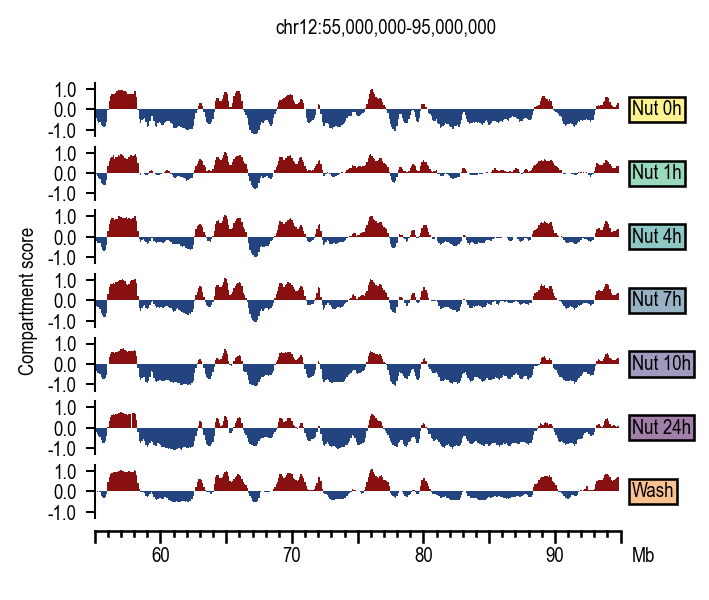

In [28]:
chrom = "12"
beg = 55_000_000
end = 95_000_000

plt.figure(figsize=(4.2, 3.5), dpi=185)

tmp_bf = bf.select(bf_compartments, f"{chrom}:{beg}-{end}")
xmin = tmp_bf['start'].iloc[0]
xmax = tmp_bf['start'].iloc[-1]

for nt, t0 in enumerate(times, 1): 
    axe = plt.subplot(len(times) + 1, 1, nt)
    plt.subplots_adjust(right=0.8)
    tmp_comp_y = [r[1][f"WT-NUT-{t0}"] for r in tmp_bf[tmp_bf[f'WT-NUT-{t0}'] > 0].iterrows()]
    tmp_comp_x = [r[1]["start"]        for r in tmp_bf[tmp_bf[f'WT-NUT-{t0}'] > 0].iterrows()]
    axe.bar(tmp_comp_x, tmp_comp_y, width=100_000, color='#881010')
    tmp_comp_y = [r[1][f"WT-NUT-{t0}"] for r in tmp_bf[tmp_bf[f'WT-NUT-{t0}'] < 0].iterrows()]
    tmp_comp_x = [r[1]["start"]        for r in tmp_bf[tmp_bf[f'WT-NUT-{t0}'] < 0].iterrows()]
    axe.bar(tmp_comp_x, tmp_comp_y, width=100_000, color='#23447F')

    if nt == 4:
        axe.set_ylabel('Compartment score', size=8)
    # plt.fill_between(tmp_comp_x, tmp_comp_y, where=np.array(tmp_comp_y) > 0, color="tab:red" , alpha=0.3)
    # plt.fill_between(tmp_comp_x, tmp_comp_y, where=np.array(tmp_comp_y) < 0, color="tab:blue", alpha=0.3)
    # plt.axhline(0, color='k', ls="--", lw=1)
    axe.set_ylim(-1.3, 1.3)
    axe.set_yticklabels(['', '-1.0', '0.0', '1.0'], size=8)
    axe.set_xlim(xmin, xmax)
    axe.spines[['right', 'top', 'bottom']].set_visible(False)
    axe.set_xticks([])

    plt.text(xmax * 1.01, 0, "Wash" if t0.startswith("w") else f'Nut {t0}', va='center', 
             bbox=dict(boxstyle="square", ec=(0, 0, 0, 1), 
                       fc=colors[t0], alpha=None, pad=0.15), size=8)
    
axe = plt.subplot(len(times) + 1, 1, nt + 1)
axe.plot([xmin, xmax], [0.95, 0.95], 'k', lw=1, clip_on=False)
for n, k in enumerate(range(beg, end + 1, 1_000_000)):
    if n % 5 == 0:
        axe.plot([k, k], [0.95, 0.75], 'k', lw=1, clip_on=False)
    else:
        axe.plot([k, k], [0.95, 0.85], 'k', lw=1, clip_on=False)
    if (n + 5) % 10 == 0:
        axe.text(k, 0.65, f"{k // 1_000_000}", va='top', ha='center', size=8)
axe.text(xmax * 1.01, 0.65, "Mb", va='top', size=8)

axe.set_ylim(0, 1)
axe.set_xlim(xmin, xmax)
axe.axison = False
plt.suptitle(f"chr{chrom}:{beg:,}-{end:,}", size=8)
# plt.savefig('some_path.pdf', dpi=300)

/tmp/ipykernel_74067/2498001990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_bf[f'diff-{t}'] = tmp_bf[f'WT-NUT-{t}'] - tmp_bf['WT-NUT-0h']
/tmp/ipykernel_74067/2498001990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_bf[f'diff-{t}'] = tmp_bf[f'WT-NUT-{t}'] - tmp_bf['WT-NUT-0h']
/tmp/ipykernel_74067/2498001990.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Text(0.5, 0.98, 'chr12:55,000,000-95,000,000')

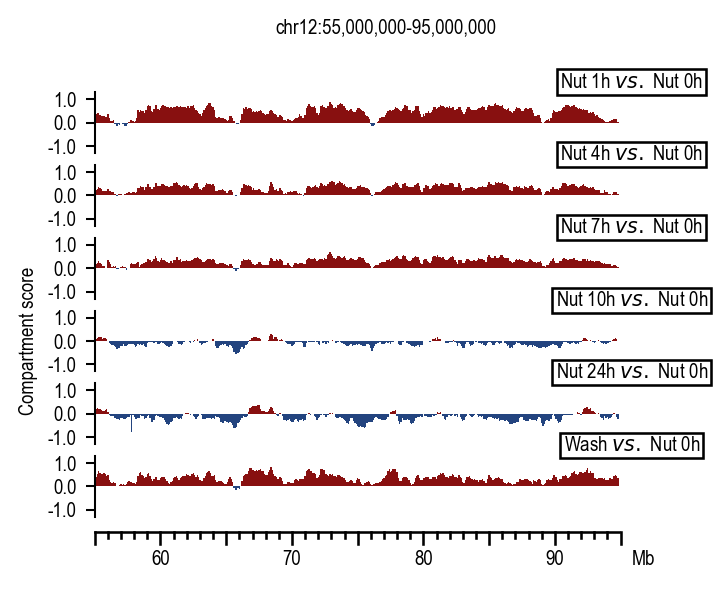

In [29]:
chrom = "12"
beg = 55_000_000
end = 95_000_000

plt.figure(figsize=(4.2, 4), dpi=185)

tmp_bf = bf.select(bf_compartments, f"{chrom}:{beg}-{end}")

for t in times:
    tmp_bf[f'diff-{t}'] = tmp_bf[f'WT-NUT-{t}'] - tmp_bf['WT-NUT-0h']

xmin = tmp_bf['start'].iloc[0]
xmax = tmp_bf['start'].iloc[-1]

for nt, t0 in enumerate(times[1:], 1):
    axe = plt.subplot(len(times) + 1, 1, nt)
    plt.subplots_adjust(right=0.8)
    tmp_comp_y = [r[1][f"diff-{t0}"] for r in tmp_bf[tmp_bf[f'diff-{t0}'] > 0].iterrows()]
    tmp_comp_x = [r[1]["start"]      for r in tmp_bf[tmp_bf[f'diff-{t0}'] > 0].iterrows()]
    axe.bar(tmp_comp_x, tmp_comp_y, width=100_000, color='#881010')

    tmp_comp_y = [r[1][f"diff-{t0}"] for r in tmp_bf[tmp_bf[f'diff-{t0}'] < 0].iterrows()]
    tmp_comp_x = [r[1]["start"]      for r in tmp_bf[tmp_bf[f'diff-{t0}'] < 0].iterrows()]
    axe.bar(tmp_comp_x, tmp_comp_y, width=100_000, color='#23447F')

    if nt == 4:
        axe.set_ylabel('Compartment score', size=8)
    # plt.fill_between(tmp_comp_x, tmp_comp_y, where=np.array(tmp_comp_y) > 0, color="tab:red" , alpha=0.3)
    # plt.fill_between(tmp_comp_x, tmp_comp_y, where=np.array(tmp_comp_y) < 0, color="tab:blue", alpha=0.3)
    # plt.axhline(0, color='k', ls="--", lw=1)
    axe.set_ylim(-1.3, 1.3)
    axe.set_yticklabels(['', '-1.0', '0.0', '1.0'], size=8)
    axe.set_xlim(xmin, xmax)
    axe.spines[['right', 'top', 'bottom']].set_visible(False)
    axe.set_xticks([])

    plt.text(xmax * 1.01, 1.75, "Wash $vs.$ Nut 0h" if t0.startswith("w") else f'Nut {t0} $vs.$ Nut 0h', va='center', ha='center',
             bbox=dict(boxstyle="square", ec=(0, 0, 0, 1), fc='w', alpha=None, pad=0.15), size=8)
    
axe = plt.subplot(len(times) + 1, 1, nt + 1)
axe.plot([xmin, xmax], [0.95, 0.95], 'k', lw=1, clip_on=False)
for n, k in enumerate(range(beg, end + 1, 1_000_000)):
    if n % 5 == 0:
        axe.plot([k, k], [0.95, 0.75], 'k', lw=1, clip_on=False)
    else:
        axe.plot([k, k], [0.95, 0.85], 'k', lw=1, clip_on=False)
    if (n + 5) % 10 == 0:
        axe.text(k, 0.65, f"{k // 1_000_000}", va='top', ha='center', size=8)
axe.text(xmax * 1.01, 0.65, "Mb", va='top', size=8)

axe.set_ylim(0, 1)
axe.set_xlim(xmin, xmax)
axe.axison = False
plt.suptitle(f"chr{chrom}:{beg:,}-{end:,}", size=8)
# plt.savefig('some_path.pdf', dpi=300)